## In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset. 

### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [220]:
import pandas as pd
df = pd.read_csv ('auto-mpg.csv') # load dataframe
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

### 2. Begin by prepping the data for modeling:
#### Remove the car name column.
#### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
#### Create dummy variables for the origin column.

In [221]:
# Remove the car name column
df = df.drop('car name', 1)
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70  

In [222]:
# The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
df.info()
# horsepower is an object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [223]:
## Use to_numeric with errors = 'coerce' to fill strings with NaN
df['horsepower'] = df['horsepower'].apply(pd.to_numeric, errors='coerce')

## Find mean of column
mean = df['horsepower'].mean()
print (mean)

## Replace all NA's in column with mean
df['horsepower'] = df['horsepower'].fillna(mean)

104.46938775510205


In [224]:
df.info()
# horsepower changed from object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [225]:
# Create dummy variables for the origin column.
df['origin_1'] = df['origin'].apply(lambda x: 1 if x == 1 else 0) # create origin_1 column that lists 1 if origin column is 1, otherwise origin_1 will be 0
df['origin_2'] = df['origin'].apply(lambda x: 1 if x == 2 else 0) # create origin_2 column that lists 1 if origin column is 2, otherwise origin_1 will be 0
df['origin_3'] = df['origin'].apply(lambda x: 1 if x == 3 else 0) # create origin_3 column that lists 1 if origin column is 3, otherwise origin_1 will be 0

In [226]:
df.head(25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,1,0,0


### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

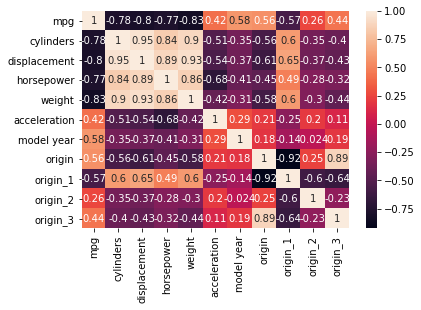

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix of the auto df and call is correlation_mat
correlation_mat = df.corr()
# using the correlation_mat above, create a visualization using a heatmap
sns.heatmap(correlation_mat, annot = True)
plt.show()

# Highly negatively correlated: MPG and Weight, MPG and cylinders, MPG and displacement
# Highly positivitly correlated: Cylinders and Weight, Cylinders and Displacement, Displacement and Weight

### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

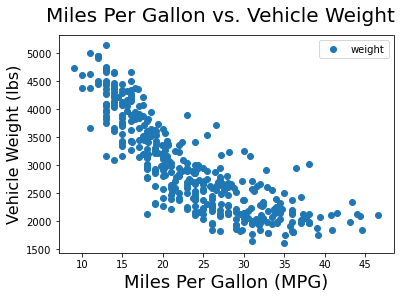

In [231]:
# Create a plot of mpg vs. weight
df.plot(x='mpg', y='weight', style='o')
plt.suptitle('Miles Per Gallon vs. Vehicle Weight', fontsize=20)
plt.xlabel('Miles Per Gallon (MPG)', fontsize=18)
plt.ylabel('Vehicle Weight (lbs)', fontsize=16)
plt.savefig('MPGWeight.jpg')

# The results of the graph show that heavier vehicles have a lower MPG, and lighter vehicles generlaly have a higher MPG. 
# In essence, the relationship between MPG and vehicle weight is inversely related - as one goes up, and other goes down and vice versa.
# These results are in agreement with the correlation coefficient as MPG and Weight are highly negatively correlated.

### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [233]:
import numpy as np
df.columns #show summary of columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'origin_1', 'origin_2',
       'origin_3'],
      dtype='object')

In [234]:
# create new df with no mpg column
df_nompg = df[df.columns.difference(['mpg'])] 
df_nompg

,acceleration,cylinders,displacement,horsepower,model year,origin,origin_1,origin_2,origin_3,weight
0,12.0,8,307.0,130.0,70,1,1,0,0,3504
1,11.5,8,350.0,165.0,70,1,1,0,0,3693
2,11.0,8,318.0,150.0,70,1,1,0,0,3436
3,12.0,8,304.0,150.0,70,1,1,0,0,3433
4,10.5,8,302.0,140.0,70,1,1,0,0,3449
...,...,...,...,...,...,...,...,...,...,...
393,15.6,4,140.0,86.0,82,1,1,0,0,2790
394,24.6,4,97.0,52.0,82,2,0,1,0,2130
395,11.6,4,135.0,84.0,82,1,1,0,0,2295
396,18.6,4,120.0,79.0,82,1,1,0,0,2625


In [235]:
# Split data into testing and training sets
from sklearn.model_selection import train_test_split

# Create x_train, x_test, y_train, y_test using train_test_split function with a test size of 20% (training is 80%)
x_train, x_test, y_train, y_test = train_test_split(df_nompg, df[['mpg']], test_size=.2)

In [236]:
# Test the shape to see if it matches the y_train shape rows
x_train.shape

(318, 10)

In [238]:
# Test the shape to see if it matches the x_train shape rows
y_train.shape

(318, 1)

### 6. Train an ordinary linear regression on the training data.

In [239]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)
# Use model to make predictions on test set
y_pred = model.predict(x_test)

### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [240]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Printout Testing set relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

# Findings:
# The low RMSE of 3.16 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
# The R2 value of 0.83 (83%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value

Model Coefficients: [[ 0.18349984 -0.1565573   0.02339244 -0.01041814  0.79689476  0.87200456
  -0.94173545  1.01146635 -0.0697309  -0.00747231]]
Mean Absolute Error (MAE): 2.488700092011464
Root Mean Squared Error (RMSE): 3.1672060067400554
Coefficient of Determination (R2): 0.8279836460017768


In [241]:
# Use model to make predictions on training set
y_pred_train = model.predict(x_train)

# Printout Training set relevant metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train)) #on average, how far away the predictions are from values
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_train, y_pred_train)))
print("Coefficient of Determination (R2):", r2_score(y_train, y_pred_train))

# Findings:
# The low RMSE of 3.31 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
# The R2 value of 0.82 (82%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value, and is better than the test set at 0.77

Mean Absolute Error (MAE): 2.5516743893793907
Root Mean Squared Error (RMSE): 3.307161258842476
Coefficient of Determination (R2): 0.8220066123325616


### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [242]:
## Ridge Regression
#load libraries
from sklearn import linear_model

# train the model
rgr = linear_model.Ridge().fit(x_train, y_train)

# Use model to make predictions
y_pred_rgr = rgr.predict(x_test)

In [243]:
### Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# Printout Testing set relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rgr))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_rgr)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_rgr))

# Findings:
# The low RMSE of 3.16 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
# The R2 value of 0.83 (83%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value
# These metrics are almost identical to testing set metrics in linear regression

Model Coefficients: [[ 0.18349984 -0.1565573   0.02339244 -0.01041814  0.79689476  0.87200456
  -0.94173545  1.01146635 -0.0697309  -0.00747231]]
Mean Absolute Error (MAE): 2.4882160774152426
Root Mean Squared Error (RMSE): 3.1670511835428004
Coefficient of Determination (R2): 0.8280004630139431


In [244]:
# Use model to make predictions on training set
y_pred_rgr_train = rgr.predict(x_train)

# Printout Training set relevant metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_rgr_train)) #on average, how far away the predictions are from values
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_train, y_pred_rgr_train)))
print("Coefficient of Determination (R2):", r2_score(y_train, y_pred_rgr_train))

# Findings:
# The low RMSE of 3.30 means that the predictions are not that far away from the values (mpg range from 12-18), and the predictions are relatively accurate
# The R2 value of 0.82 (82%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value, and is better than the test set at 0.77
# These metrics are almost identical to training set metrics in linear regression

Mean Absolute Error (MAE): 2.55129703281675
Root Mean Squared Error (RMSE): 3.307177689416894
Coefficient of Determination (R2): 0.822004843721576
